In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


In [51]:

df = pd.read_csv("titanic/train.csv")

In [52]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)


/tmp/ipykernel_16600/2985108452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_16600/2985108452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

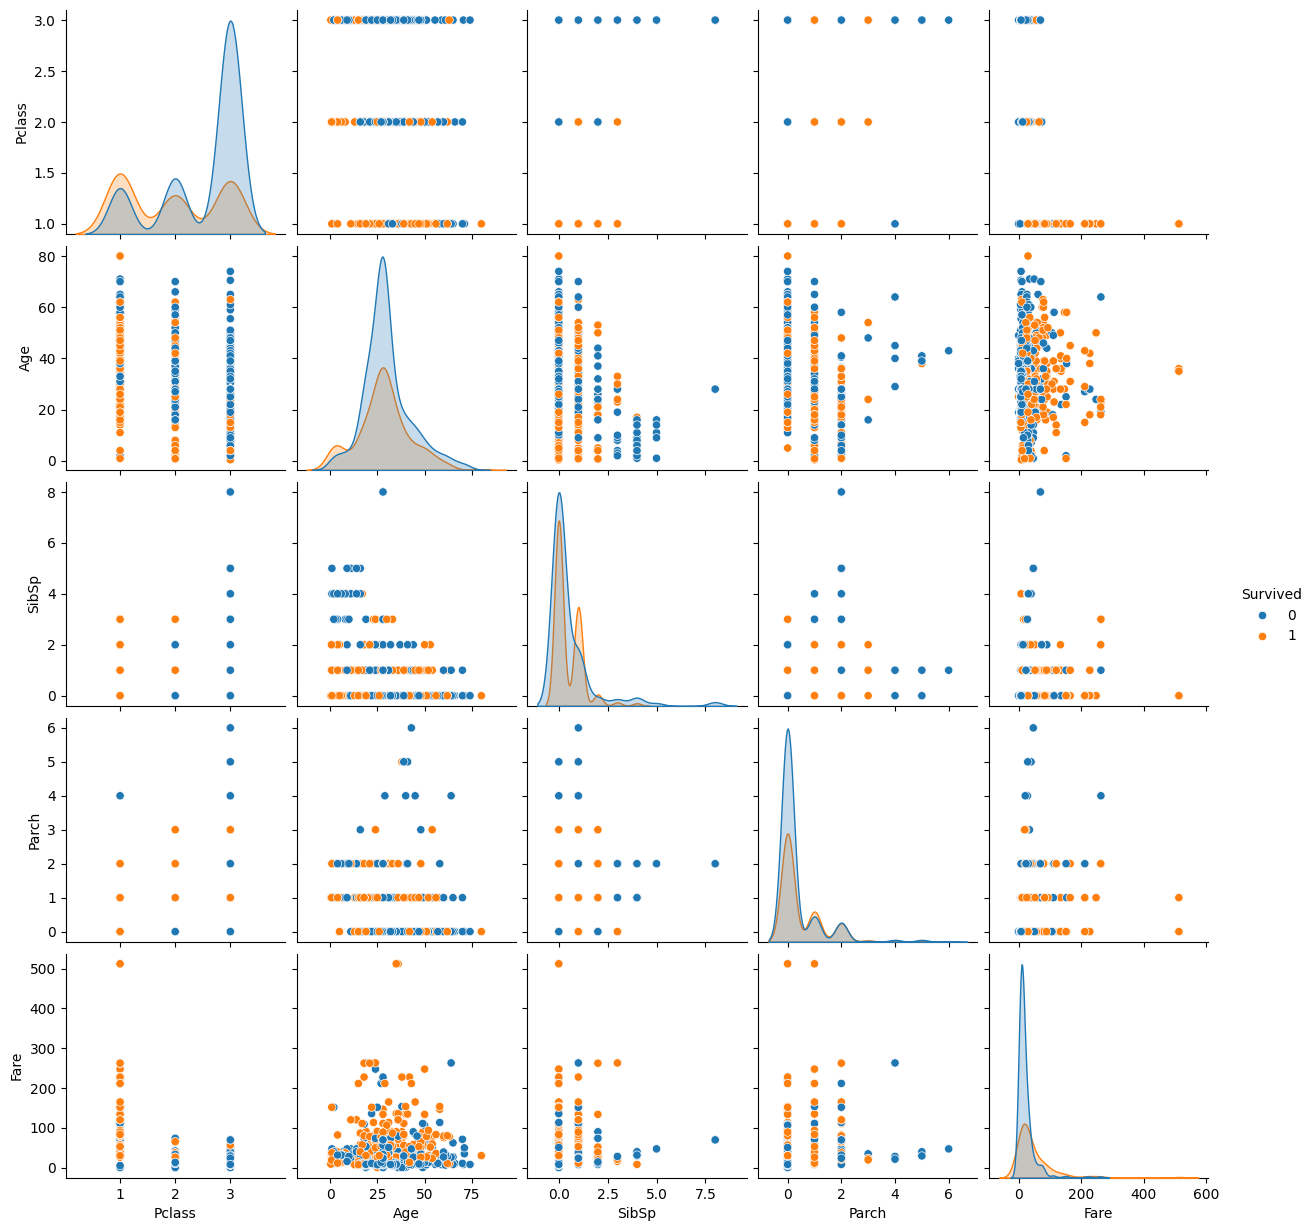

In [53]:
sns.pairplot(df, hue='Survived')
plt.show()

In [54]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [55]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [56]:
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


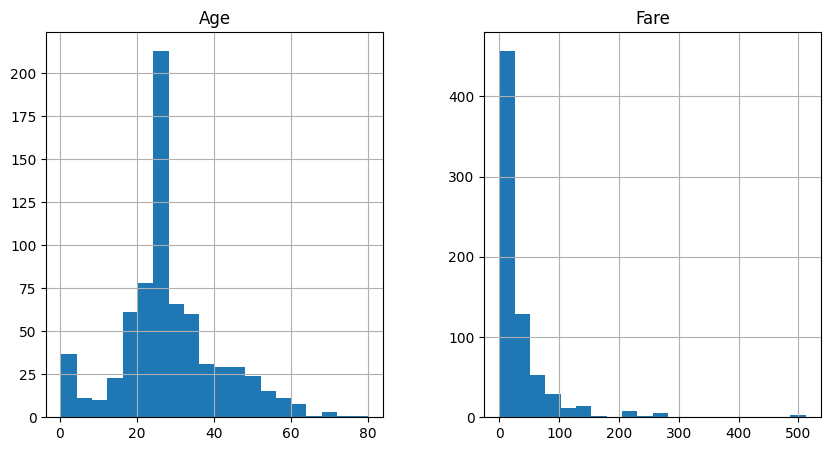

In [57]:
df_train[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

# GridSearch para otimizar a árvore de decisão
modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [59]:
modelo.fit(df_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8]},
             verbose=1)

In [60]:
best_model = modelo.best_estimator_
print("Melhores parâmetros:", modelo.best_params_)


Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


In [61]:
modelo= DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.8)
modelo.fit(df_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.8)

In [62]:
y_pred = best_model.predict(df_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [63]:
print(f"Acurácia: {accuracy:.4f}")
print(report)

Acurácia: 0.7989
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



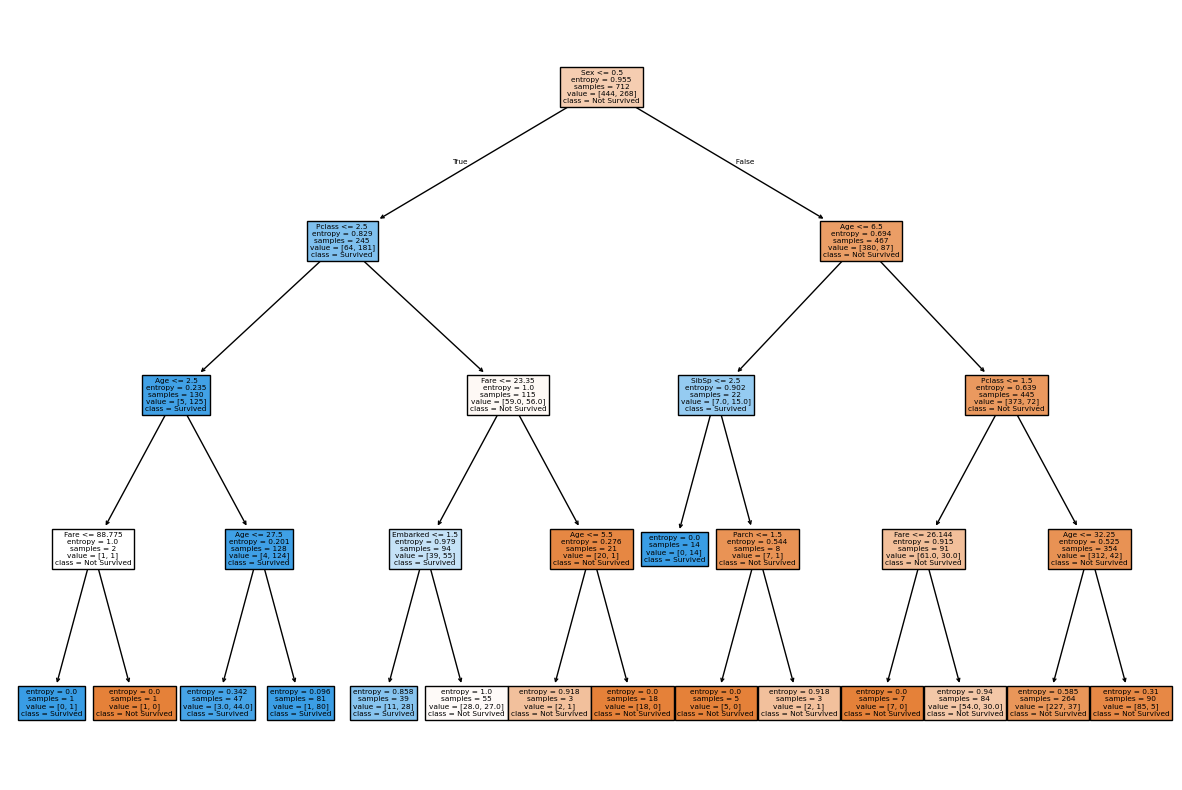

In [64]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

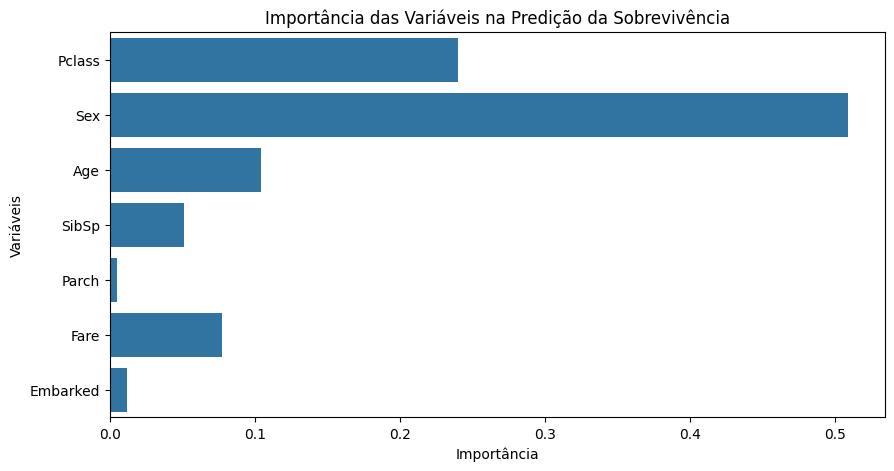

In [65]:
feature_importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis na Predição da Sobrevivência")
plt.show()


In [66]:
print("\nPadrões de sobrevivência identificados pelo modelo:")
if 'Sex' in X.columns:
    survived_by_sex = df.groupby('Sex')['Survived'].mean()
    print("- Mulheres tinham maior chance de sobreviver: ", survived_by_sex[1])
    print("- Homens tinham menor chance de sobreviver: ", survived_by_sex[0])

if 'Pclass' in X.columns:
    survived_by_class = df.groupby('Pclass')['Survived'].mean()
    print("- Passageiros da 1ª classe tinham maior chance de sobreviver: ", survived_by_class[1])
    print("- Passageiros da 3ª classe tinham menor chance de sobreviver: ", survived_by_class[3])

if 'Age' in X.columns:
    children_survival = df[df['Age'] < 18]['Survived'].mean()
    print("- Crianças tinham maior chance de sobreviver: ", children_survival)



Padrões de sobrevivência identificados pelo modelo:
- Mulheres tinham maior chance de sobreviver:  0.18890814558058924
- Homens tinham menor chance de sobreviver:  0.7420382165605095
- Passageiros da 1ª classe tinham maior chance de sobreviver:  0.6296296296296297
- Passageiros da 3ª classe tinham menor chance de sobreviver:  0.24236252545824846
- Crianças tinham maior chance de sobreviver:  0.5398230088495575
